# Post Analysis Pipelines
""

This notebook is designed to do post-analysis based on the results obtained by the 'XPCS_single' pipeline. There are three methods available to load saved data for post-analysis. 

## Overview

* Method I:   load saved csv files directly
* Method II:  load saved h5 files
* Method III: build a results dict by loading saved h5 files 
 

In [1]:
from pyCHX.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
import pickle as cpk
from pyCHX.chx_xpcs_xsvs_jupyter_V1 import *
import pandas as pds

In [2]:
%matplotlib notebook

In [3]:
from pyCHX.chx_libs import colors, markers

In [4]:
load_csv = True 
load_h5 = True




# Setup: serach/give uids, datapath

### Search uids by giving start/end time

In [5]:
import datetime
START_TIME = time.mktime(  datetime.datetime(2019, 3, 7, 0,  30, 0,0).timetuple() ) 
STOP_TIME = time.mktime(  datetime.datetime( 2019, 3, 7, 10, 30, 0,0).timetuple() ) 
fuids, uids, sids, all_info = get_print_uids( START_TIME, STOP_TIME,return_all_info=True)

  0: uid = '24f7ff' ##Thu Mar  7 09:01:20 2019 #5693: --  24f7ff0e-5592-46a4-b875-7fb37f4080b5 
  1: uid = '63ea90' ##Thu Mar  7 09:03:45 2019 #5694: --  63ea9097-6188-4351-87f1-d68e5afb4a11 
  2: uid = 'c92e60' ##Thu Mar  7 09:06:09 2019 #5695: --  c92e6094-834e-497d-9535-717bd54ae852 
  3: uid = '8b6011' ##Thu Mar  7 09:39:41 2019 #5696: --  8b601193-971b-438c-9ec1-30fa99f46e3c 
  4: uid = 'e28534' ##Thu Mar  7 09:41:29 2019 #5697: --  e285340c-b4d3-4968-9a93-a32dba7c6174 
  5: uid = 'b3bf11' ##Thu Mar  7 09:44:14 2019 #5698: --  b3bf1186-d3ef-4f2a-a477-a125e65b22d5 
  6: uid = '6639d5' ##Thu Mar  7 09:45:41 2019 #5699: --  6639d5ef-a362-4660-bd43-ebc9fac059b9 
  7: uid = '3c3e63' ##Thu Mar  7 09:47:35 2019 #5700: --  3c3e6383-fc14-4a30-a893-035a81df10b1 
  8: uid = 'e48495' ##Thu Mar  7 09:48:36 2019 #5701: --  e484956d-12b8-4a71-9b03-9fad50dab37f 
  9: uid = '932aeb' ##Thu Mar  7 09:51:23 2019 #5702: --  932aebcf-bf1f-49cd-a591-d93a9a863470 
 10: uid = 'd5d7f1' ##Thu Mar  7 10:10:2

/opt/conda_envs/analysis-2019-1.2-chx/lib/python3.6/site-packages/databroker/utils.py:60: UserWarning: The keyword 'start_time' and 'stop_time' have been renamed to 'since' and 'until'. The old names are deprecated.
  warnings.warn("The keyword 'start_time' and 'stop_time' have been "


In [11]:
inDir = '/nsls2/xf11id1/analysis/2019_3/yuzhang/Results/'

# Method I: load csv file

## Give one uid here

In [32]:
uid = '4740b6b5-20cb-4ad1-9f7a-b7a2b3a77659'
uid = '3b5404e7-ce05-4415-9ce8-fd488b19f0'

fuid = db[uid]['start']['uid']
print(fuid)
print('Temperature is : %s'%db[uid]['start']['T_yoke'])

3b5404e7-ce05-4415-9ce8-fd488b19f078
Temperature is : 24.709


In [33]:
inDir_ = inDir + fuid + '/'
print(inDir_)
timeperframe = float(db[fuid]['start']['acquire period'])
Nimg =   int(db[fuid]['start']['number of images']  )


/nsls2/xf11id1/analysis/2019_3/yuzhang/Results/3b5404e7-ce05-4415-9ce8-fd488b19f078/


In [24]:
#ls /nsls2/xf11id1/analysis/2019_3/yuzhang/Results/4740b6b5-20cb-4ad1-9f7a-b7a2b3a77659/

In [37]:
fp = inDir + fuid + '/' + 'uid=%s_fra_5_%i_rings_g2.csv'%(fuid[:8], Nimg )
print(fp)
d = pds.read_csv( fp )
cols = list(d.columns)
#qr = np.float_( cols[2:] )
#tau, g2  = d['tau'], d[ ]
tau, g2 = np.array(d)[:,1], np.array(d)[:,2:]

/nsls2/xf11id1/analysis/2019_3/yuzhang/Results/3b5404e7-ce05-4415-9ce8-fd488b19f078/uid=3b5404e7_fra_5_1000_rings_g2.csv


<IPython.core.display.Javascript object>


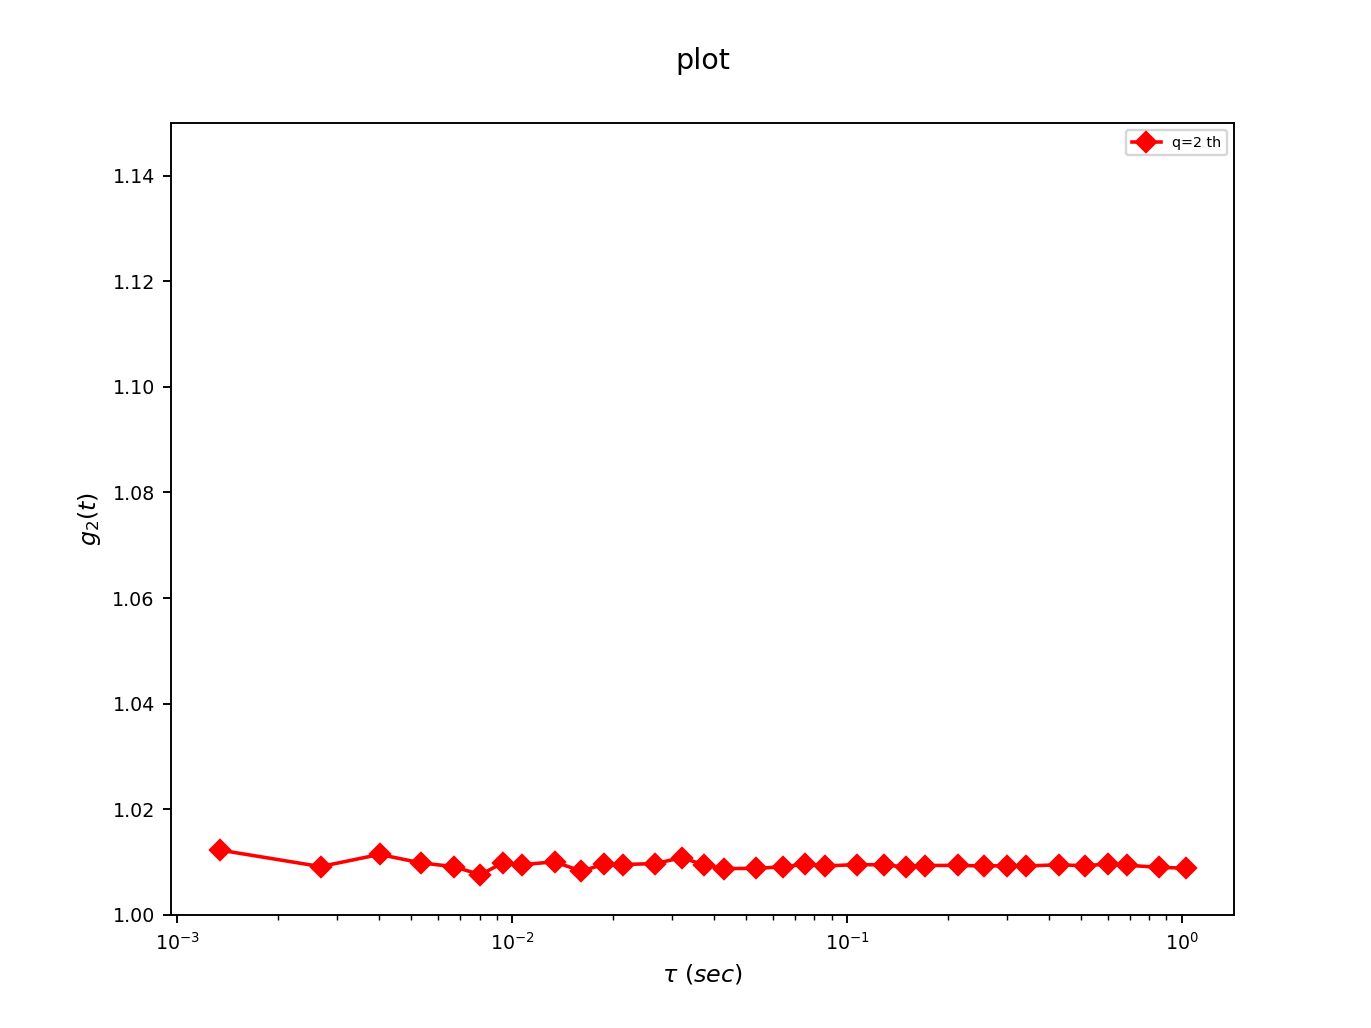

Text(0, 0.5, '$g_2(t)$')

In [35]:
fig = plt.figure( figsize=[8,6])
plt.title( 'uid=%s'%fuid[:6],fontsize= 14, y = 1.05) 
#plt.axis('off') 
ax = fig.add_subplot( 1,1,1 )

qth = 2
i=1
x = tau[1:]     
y=g2[1:,qth]     
plot1D( x = x, y= y, ax=ax, legend= 'q=%s th'%qth, m = markers[i], c=colors[i],
      legend_size = 6 , logx=True)
#j += 1
ax.set_ylim( [1.00, 1.15 ] )
#ax.set_title(r'$q=%.5f\  \AA^{-1}$'%qr[i])
ax.set_xlabel( r'$\tau\ (sec)$' )
ax.set_ylabel( r'$g_2(t)$' ) 

### Check multi-uids

In [65]:
uids = [  
    '3b5404e7-ce05-4415-9ce8-fd488b19f078',        
    'e42afb28-8af4-4dd8-9d5a-bf9c40864352', 
    '4740b6b5-20cb-4ad1-9f7a-b7a2b3a77659', 
       ]

sids = [ 
    'low viscosity',
    'medium viscosity',    
    'high viscosity',

    
       ]



<IPython.core.display.Javascript object>


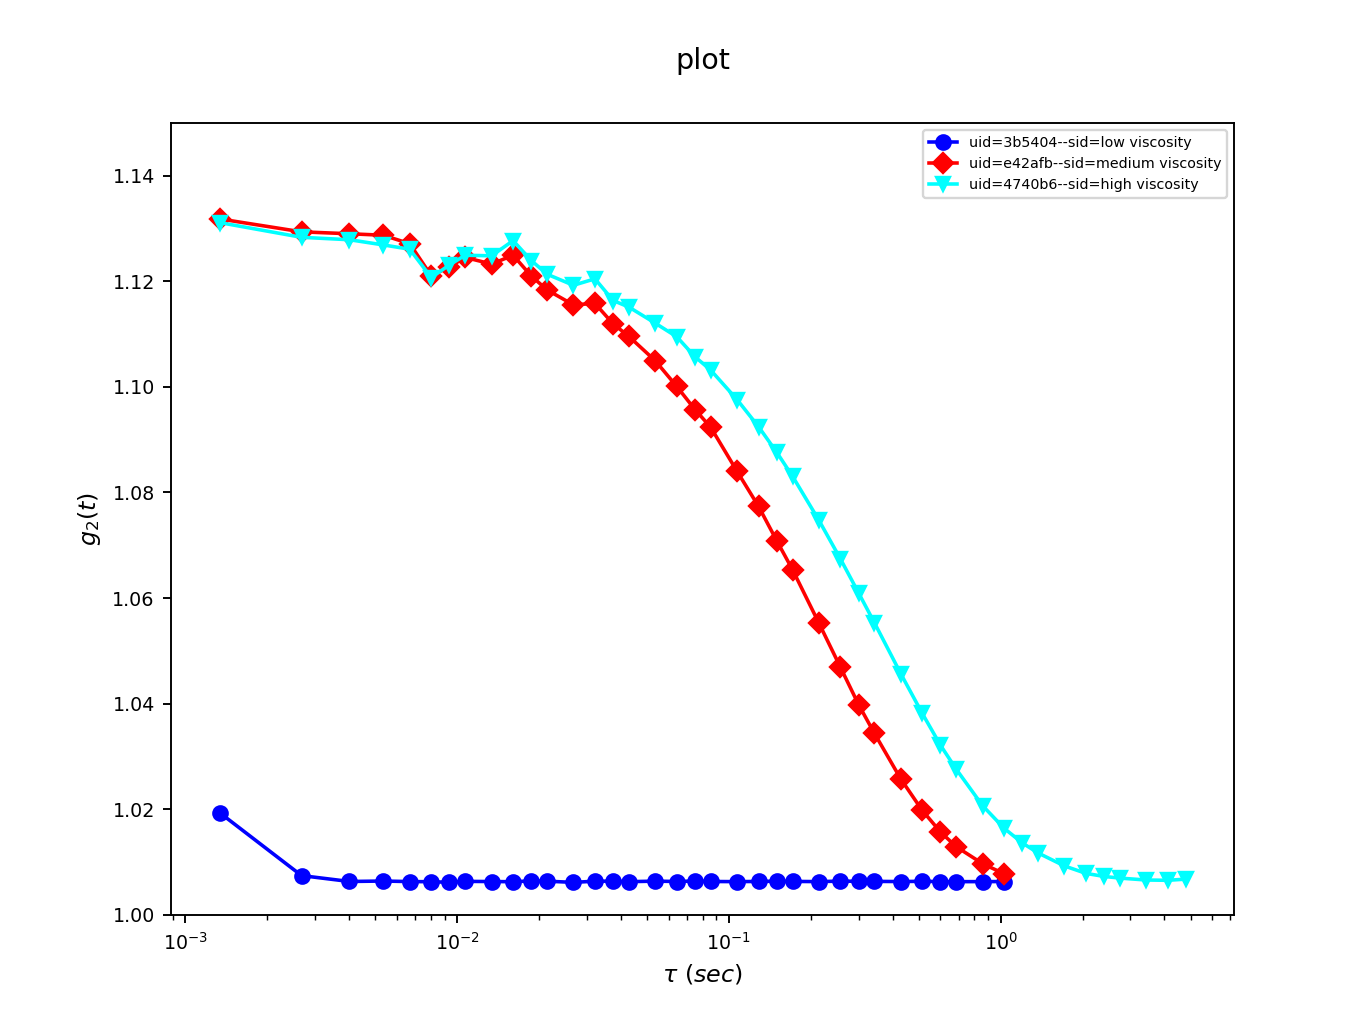

3b5404e7-ce05-4415-9ce8-fd488b19f078
/nsls2/xf11id1/analysis/2019_3/yuzhang/Results/3b5404e7-ce05-4415-9ce8-fd488b19f078/uid=3b5404e7_fra_5_1000_rings_g2.csv
e42afb28-8af4-4dd8-9d5a-bf9c40864352
/nsls2/xf11id1/analysis/2019_3/yuzhang/Results/e42afb28-8af4-4dd8-9d5a-bf9c40864352/uid=e42afb28_fra_5_1000_rings_g2.csv
4740b6b5-20cb-4ad1-9f7a-b7a2b3a77659
/nsls2/xf11id1/analysis/2019_3/yuzhang/Results/4740b6b5-20cb-4ad1-9f7a-b7a2b3a77659/uid=4740b6b5_fra_5_5000_rings_g2.csv


Text(0, 0.5, '$g_2(t)$')

In [66]:
qth = 1 #Add 1 for the real Q number


fig = plt.figure( figsize=[8,6])
plt.title( 'qth=%s'%qth,fontsize= 14, y = 1.05) 
#plt.axis('off') 
ax = fig.add_subplot( 1,1,1 )  

for i, uid in enumerate(uids):
    fuid = db[uid]['start']['uid']
    print(uid)
    #print('Temperature is : %s'%db[uid]['start']['T_yoke'])
    inDir_ = inDir + fuid + '/'    
    
    Nimg =   int(db[uid]['start']['number of images']  )
    dets = db[uid]['start']['detectors']
    sam = db[ uid ]['start']['sample']
    for det in dets:        
        if '500' in det:
            fp = inDir + uid + '/' + 'uid=%s_fra_100_%i_rings_g2.csv'%(fuid[:8], Nimg )            
        elif '4m' in det:
            fp = inDir + uid + '/' + 'uid=%s_fra_5_%i_rings_g2.csv'%(fuid[:8], Nimg )
    print(fp)        

    d = pds.read_csv( fp )
    cols = list(d.columns)
    tau, g2 = np.array(d)[:,1], np.array(d)[:,2:]
    x = tau[1:]     
    y=g2[1:,qth]     
    plot1D( x = x, y= y, ax=ax, legend= 'uid=%s--sid=%s'%(fuid[:6],sids[i]), m = markers[i], c=colors[i],
          legend_size = 6 , logx=True)
    
ax.set_ylim( [1.00, 1.15 ] )
#ax.set_title(r'$q=%.5f\  \AA^{-1}$'%qr[i])
ax.set_xlabel( r'$\tau\ (sec)$' )
ax.set_ylabel( r'$g_2(t)$' ) 


## Show the avg_img

In [41]:
#ls /nsls2/xf11id1/analysis/2019_1/mingdali/Results/0240bc2d-7e90-4804-a7a1-99583ec459cc/

In [42]:
avg_img = cpk.load(  open( inDir +  fuid + '/' 'uid=%s_md.pkl.pkl'%fuid[:8], 'rb' ) )['avg_img']

<IPython.core.display.Javascript object>


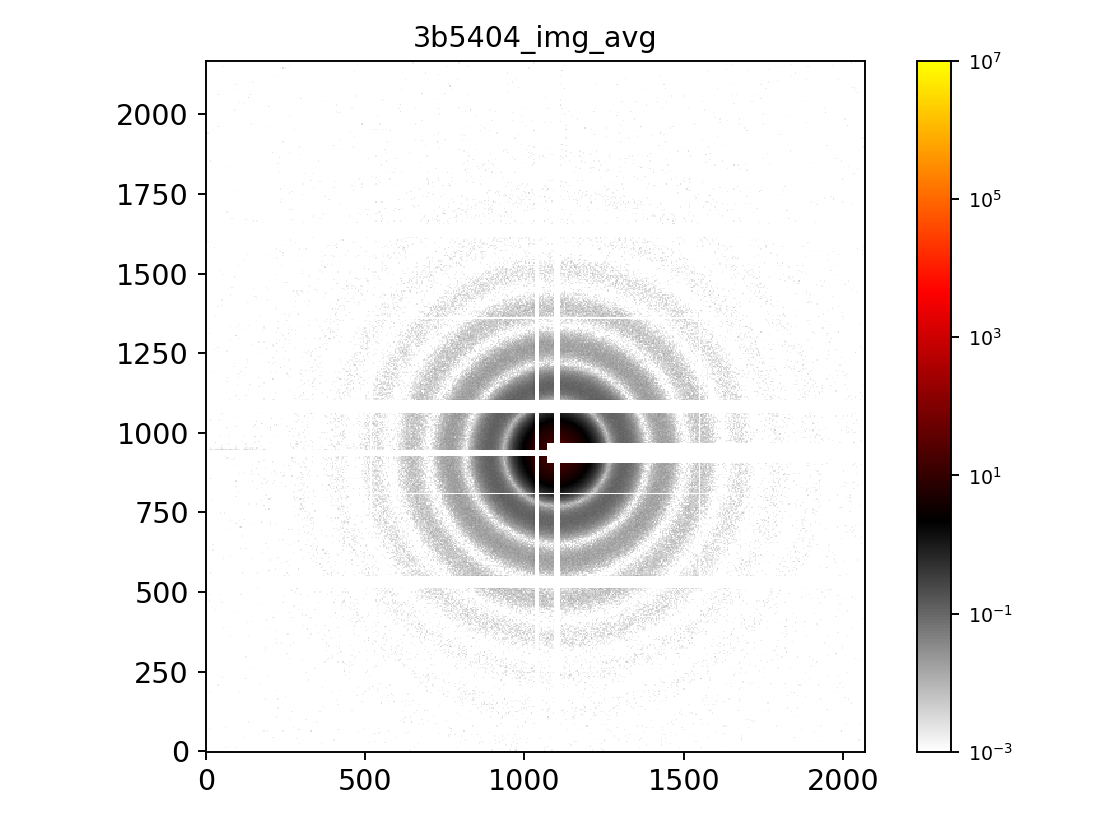

In [43]:
show_img( avg_img,  vmin=1e-3, vmax= 1e7, logs=True, aspect=1, #save_format='tif',
         image_name=  uid[:6] + '_img_avg',  save=False,   cmap = cmap_albula )

## do a line cut

<IPython.core.display.Javascript object>


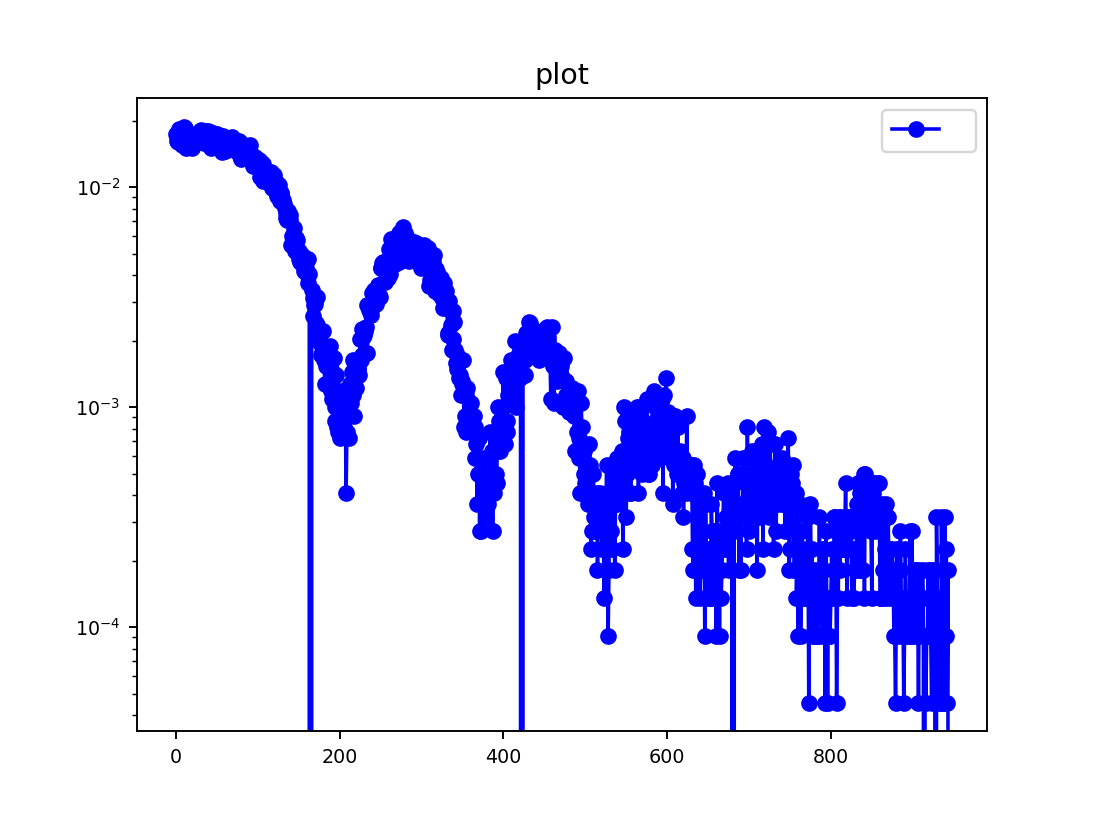

In [44]:
d=  np.average( avg_img[ 1260: 1280  ], axis=0)
plot1D(d[1125:], logy=True)

## Show Two-time


In [54]:
fuid = '4740b6b5-20cb-4ad1-9f7a-b7a2b3a77659'
inDir_ = inDir + fuid + '/'
print(inDir_)

fp = inDir_ + 'uid=%s_rings_Res.h5'%fuid
print(timeperframe, Nimg)
with h5py.File( fp, 'r') as hf:  
    g12b =  hf.get( 'g12b' )[:]
print(g12b.shape)

/nsls2/xf11id1/analysis/2019_3/yuzhang/Results/4740b6b5-20cb-4ad1-9f7a-b7a2b3a77659/
0.00134 1000
(4995, 4995, 16)


<IPython.core.display.Javascript object>


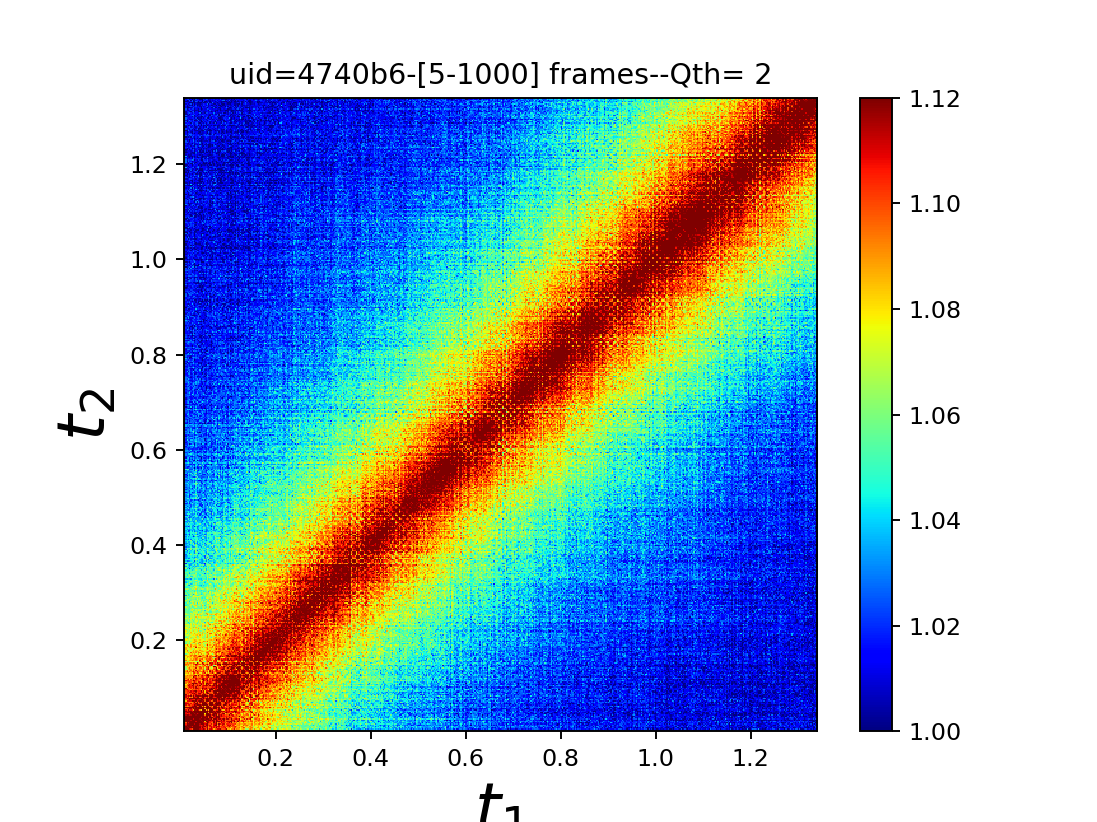

Text(0, 0.5, '$t_2$')

In [55]:
fig, ax = plt.subplots()
show_C12(g12b, q_ind= 2, logs=False, fig_ax=[fig,ax],
         N1=5, N2= Nimg, vmin= 1.0, vmax=1.12,
         timeperframe= timeperframe,save=False, show_colorbar= True,
         path= '', uid ='uid=%s'%fuid[:6] ,cmap=plt.cm.jet)#cmap=cmap_albula)    
#ax.set_title('')
#plt.yticks([  ], [  ])
#plt.xticks([  ], [  ])
ax.set_xlabel(r'$t_1$', fontsize=28)
ax.set_ylabel(r'$t_2$', fontsize=28)

<IPython.core.display.Javascript object>


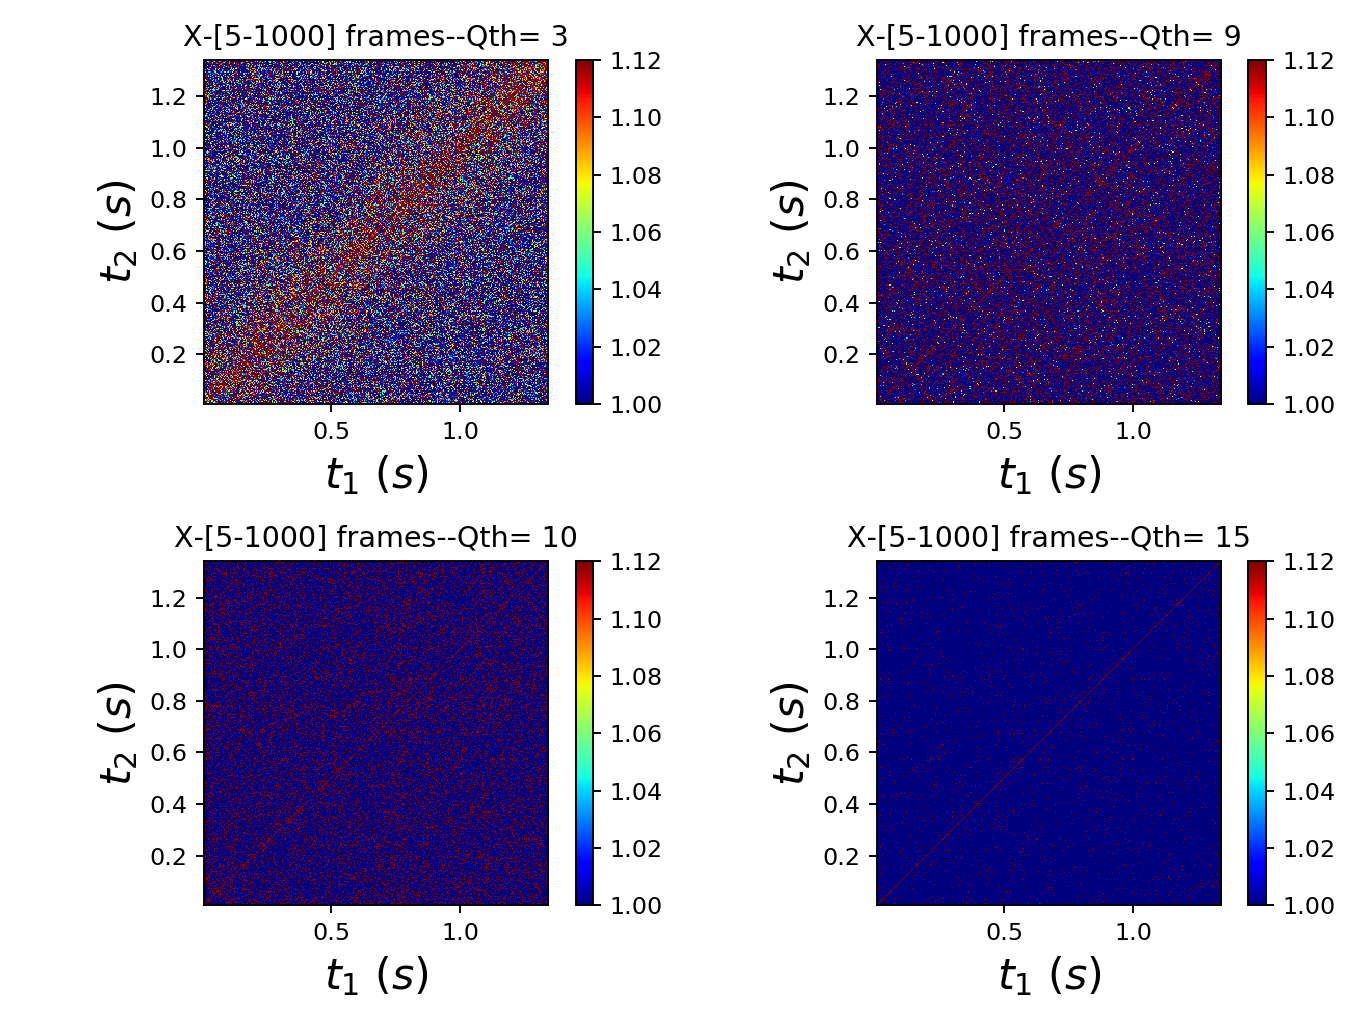

In [57]:
fig = plt.figure( figsize=[8,6])

ax = fig.add_subplot( 2,2,1 )
show_C12(g12b, q_ind= 3, logs=False, fig_ax=[fig,ax], N1=5, N2= Nimg, vmin= 1, vmax=1.12,
         timeperframe= timeperframe,save=False, show_colorbar= True, path= '', uid ='X' ,cmap=plt.cm.jet)#cmap=cmap_albula)    
ax = fig.add_subplot( 2,2,2 )
show_C12(g12b, q_ind= 9, logs=False, fig_ax=[fig,ax], N1=5, N2= Nimg, vmin= 1, vmax=1.12,
         timeperframe= timeperframe,save=False, show_colorbar= True, path= '', uid ='X' ,cmap=plt.cm.jet)#cmap=cmap_albula)    
ax = fig.add_subplot( 2,2,3 )
show_C12(g12b, q_ind= 10, logs=False, fig_ax=[fig,ax], N1=5, N2= Nimg, vmin= 1, vmax=1.12,
         timeperframe= timeperframe,save=False, show_colorbar= True, path= '', uid ='X' ,cmap=plt.cm.jet)#cmap=cmap_albula)    
ax = fig.add_subplot( 2,2,4 )
show_C12(g12b, q_ind= 15, logs=False, fig_ax=[fig,ax], N1=5, N2= Nimg, vmin= 1, vmax=1.12,
         timeperframe= timeperframe,save=False, show_colorbar= True, path= '', uid ='X' ,cmap=plt.cm.jet)#cmap=cmap_albula)    
  
    
fig.tight_layout()
#fig.savefig( outDir + 'uid=%s_two_time_fourQs'%fuid[:6] )

### Plot g2 functions

In [69]:

fp = inDir + fuid + '/' + 'uid=%s_fra_5_%i_rings_g2.csv'%(fuid[:8], Nimg )
d = pds.read_csv( fp )
cols = list(d.columns)
#qr = np.float_( cols[2:] )
#tau, g2  = d['tau'], d[ ]
tau, g2 = np.array(d)[:,1], np.array(d)[:,2:]

In [70]:
tau.shape, g2.shape

((44,), (44, 16))

In [71]:
#ls /nsls2/xf11id1/analysis/2019_1/mingdali/Results/0240bc2d-7e90-4804-a7a1-99583ec459cc/

<IPython.core.display.Javascript object>


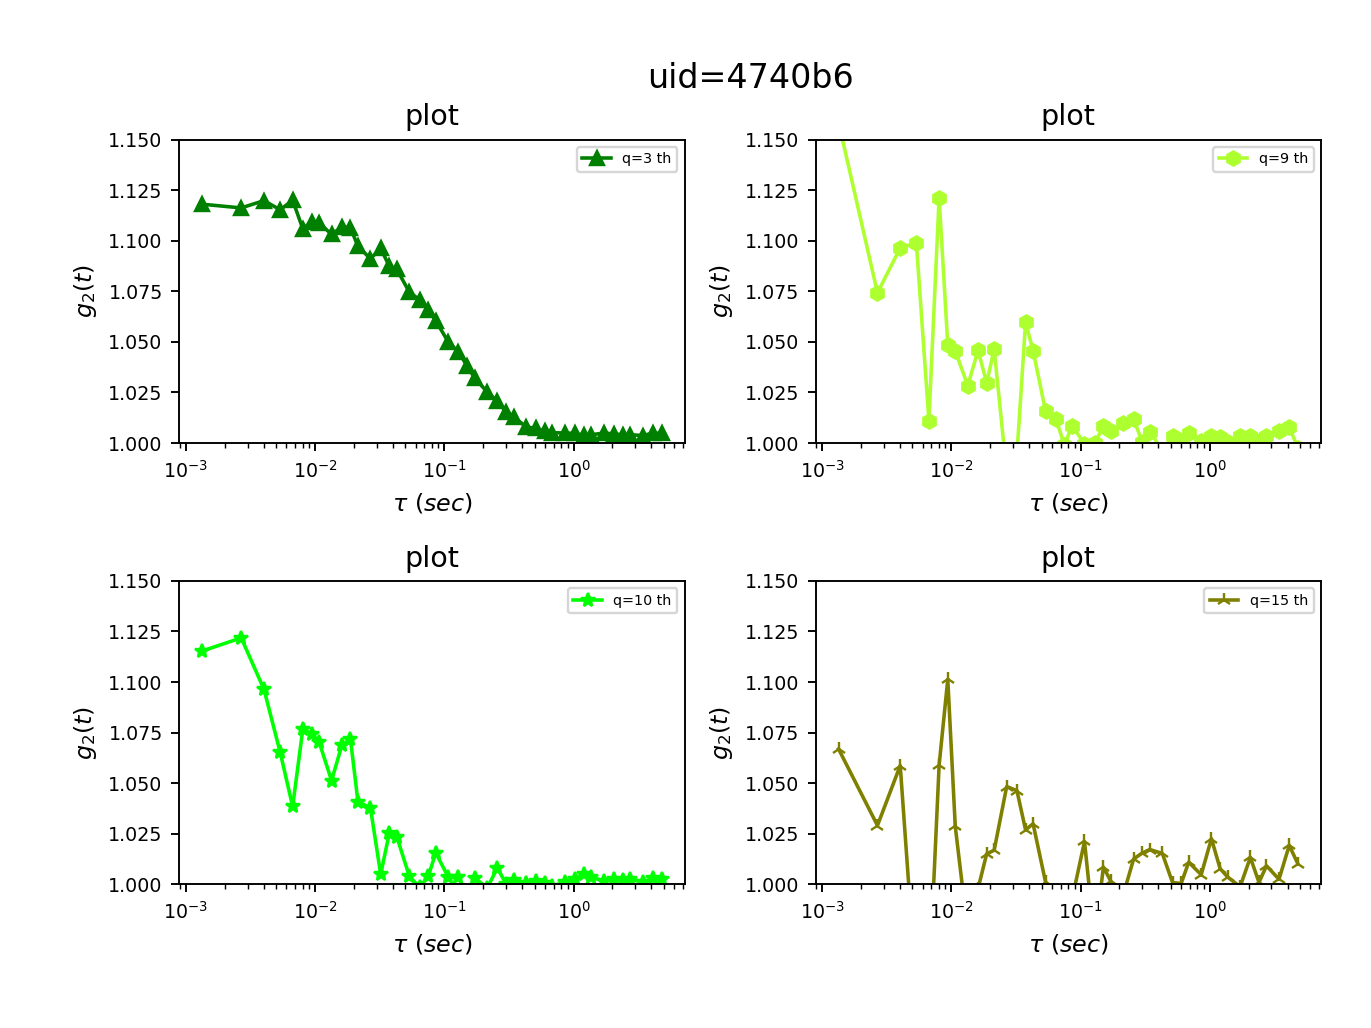

In [72]:
fig = plt.figure( figsize=[8,6])
plt.title( 'uid=%s'%fuid[:6],fontsize= 14, y = 1.05) 
plt.axis('off') 
#ax = fig.add_subplot( 1,1,1 )
#for i in range(1,16):
j = 1
for i in  [3,9,10,15]: 
    ax = fig.add_subplot( 2,2,j )
    x = tau[1:]     
    y=g2[1:,i]     
    plot1D( x = x, y= y, ax=ax, legend= 'q=%s th'%i, m = markers[i], c=colors[i],
          legend_size = 6 , logx=True)
    j += 1
    ax.set_ylim( [1.00, 1.15 ] )
    #ax.set_title(r'$q=%.5f\  \AA^{-1}$'%qr[i])
    ax.set_xlabel( r'$\tau\ (sec)$' )
    ax.set_ylabel( r'$g_2(t)$' )
#ax.set_title( r'$g_2(t)--q=%.5f \AA^{-1}$'%qval  ) 
 
fig.tight_layout()
#fig.savefig( outDir + 'uid=%s_g2_fourQs'%fuid[:6] )

# Method II: load saved h5 file

### Define Input&Result Path here

In [73]:
if load_h5:
    inDir = '/nsls2/xf11id1/analysis/2019_3/yuzhang/Results/'
    outDir = '/nsls2/xf11id1/analysis/2019_3/yuzhang/Results/Post/'
    os.makedirs(outDir, exist_ok=True)
    print('Results from this analysis will be stashed in the directory %s' %outDir)


Results from this analysis will be stashed in the directory /nsls2/xf11id1/analysis/2019_3/yuzhang/Results/Post/


## Give uid list

In [86]:
#uid_lists here
uid_list = [
    
    '3b5404e7-ce05-4415-9ce8-fd488b19f078',        
    'e42afb28-8af4-4dd8-9d5a-bf9c40864352', 
    
           ]

### Plot g2 of multi-uids 

In [87]:
%run ~/pyCHX_link/pyCHX/chx_xpcs_xsvs_jupyter_V1.py

In [88]:
def _get_leg(uid):
    m = db[uid]['start']
    strs = 'T=%.1f-Tr%.5f-Fra%s-Exp%s'%( float(m['T_yoke']), float(m['transmission']),m['number of images'], m['exposure time'])
    return strs
                                   


In [89]:
#db[-1]['start']['uid']

<IPython.core.display.Javascript object>


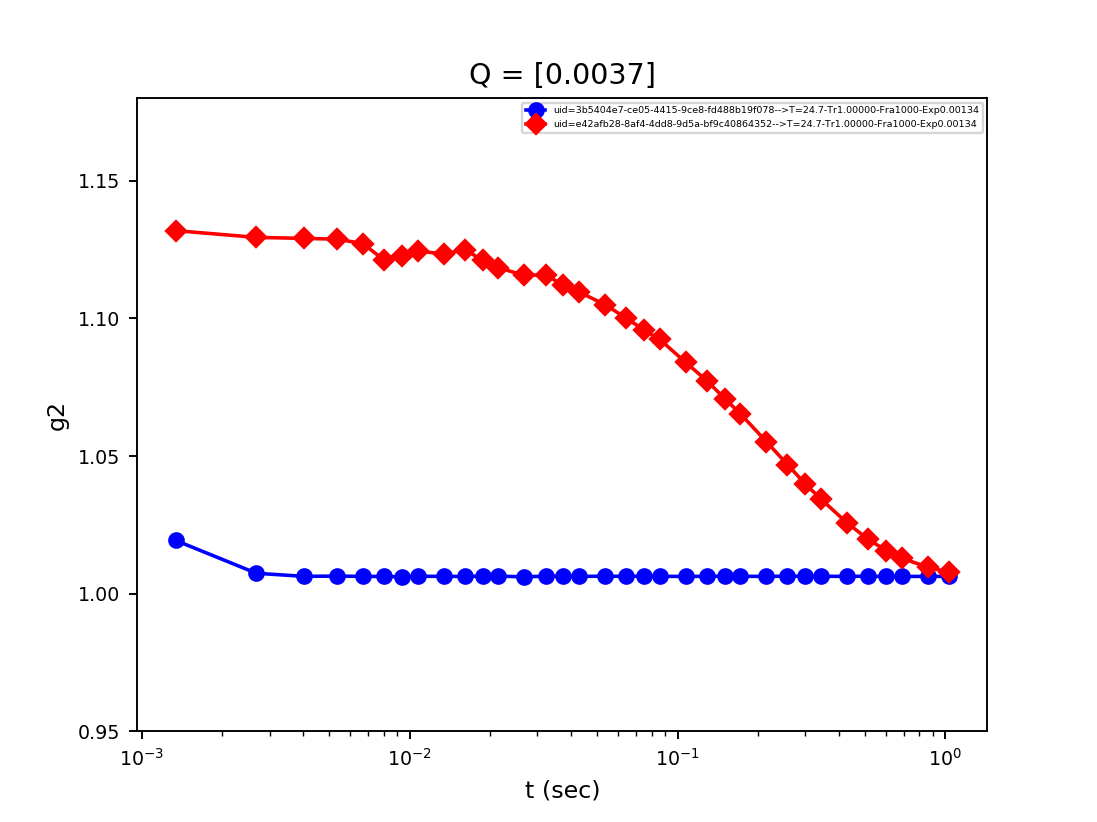

filepath : /nsls2/xf11id1/data/2019/05/31/524d1fb8-0aa7-451a-824a
got images_per_file


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f521464d780>)

In [90]:

legend_list = [ _get_leg( s )  for s in uid_list] #[ '200C 1sec 1000fra T=0.00136',
               #'200C 1sec 1000fra T=0.00024',
           #]

plot_entries_from_uids( uid_list, inDir, yshift = 0.0, legend=legend_list, qth= 1, legend_size=4,
                       key= 'g2', ylim=[0.95, 1.18], fp_fulluid = True, fp_append='_rings')

### Plot q~Iq of multi-uids for SAXS

In [91]:
%run -i /nsls2/xf11id1/analysis/Analysis_Pipelines/Develop/pyCHX/pyCHX/chx_xpcs_xsvs_jupyter_V1.py

<IPython.core.display.Javascript object>


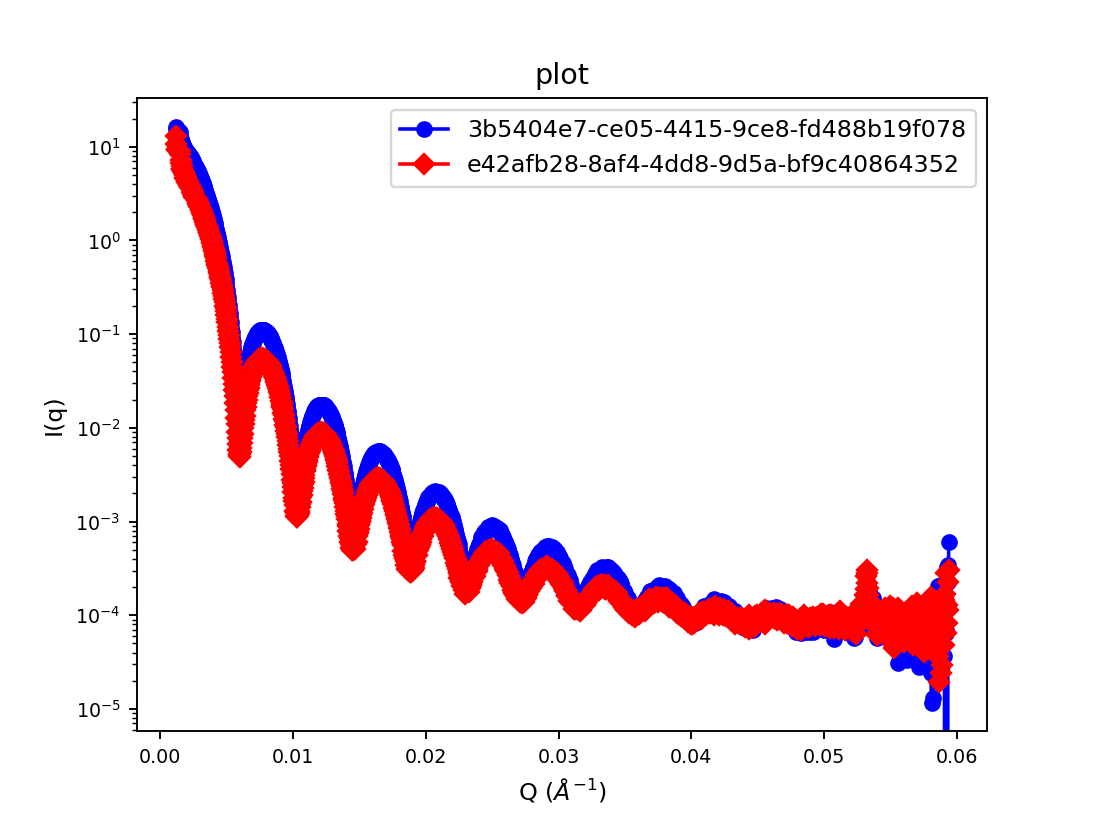

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f51fafcbeb8>)

In [92]:


plot_entries_from_uids( uid_list, inDir, yshift = 0.0, ymulti= [1, 1], key= 'iq',fp_append = '_rings'   )




### Plot ROI mean intensity of multi-uids

<IPython.core.display.Javascript object>


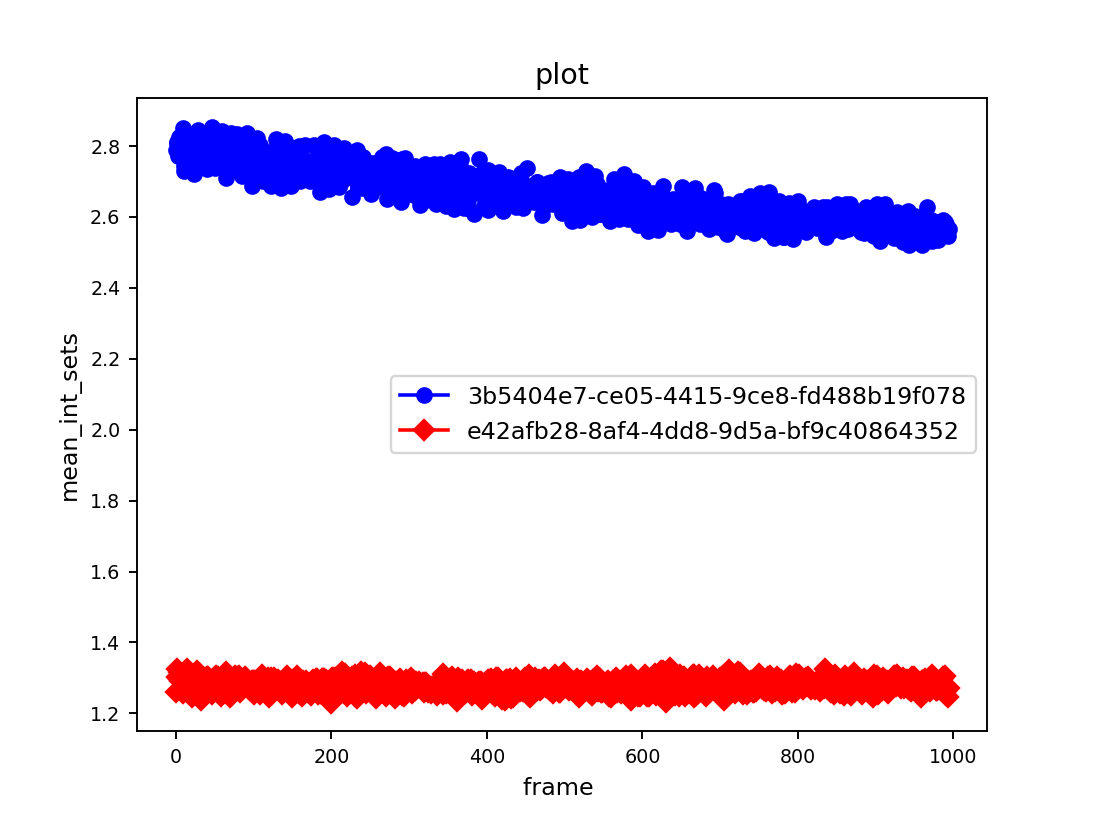

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f51fb2930b8>)

In [93]:


plot_entries_from_uids( uid_list, inDir, yshift = 0.01, key= 'mean_int_sets',fp_append = '_rings'   )


# Method III: buid dict by loading saved h5 file

## Build a uid dictionary here

In [146]:
suid_dict = {      
    #'lv': '3b5404e7-ce05-4415-9ce8-fd488b19f078',        
    'mv': 'e42afb28-8af4-4dd8-9d5a-bf9c40864352', 
            
            
            }

In [147]:
uid_dict = {}
for u in list( suid_dict.keys() ):
    uid_dict[u] =  get_meta_data( suid_dict[u] )['uid']
print( uid_dict )

{'mv': 'e42afb28-8af4-4dd8-9d5a-bf9c40864352'}


# Extract result here

In [148]:
total_res = {}

In [151]:
for u in list( uid_dict.keys() ):
    inDir_ =  inDir + suid_dict[u] + '/'
    total_res[u] = extract_xpcs_results_from_h5( filename = 'uid=%s__Res.h5'%uid_dict[u], import_dir = inDir_ )
    

In [153]:
print( total_res[list( uid_dict.keys() )[0]].keys()  )

dict_keys(['md', 'qval_dict', 'qval_dict_v', 'qval_dict_p', 'taus_uids', 'g2_uids', 'avg_img', 'bad_frame_list', 'g12b', 'g2', 'g2b', 'g4', 'imgsum', 'iq_saxs', 'iqst', 'mask', 'mean_int_sets', 'pixel_mask', 'q_saxs', 'qt', 'roi_mask', 'taus', 'taus4', 'tausb', 'times_roi', 'wat', 'g2_fit_paras', 'g2b_fit_paras'])


# Re-plot 2-time correlation function

In [158]:
dataset_no=0
u=sorted(list(uid_dict.keys()))[dataset_no]
print(u)
g12b=total_res[u]['g12b']

mv


In [159]:
g12b.shape

(995, 995, 16)

In [160]:
total_res[u]['md']['frame_time']

0.00134

In [161]:
#%run /home/yuzhang/chxanalys_link/chxanalys/Two_Time_Correlation_Function.py

<IPython.core.display.Javascript object>


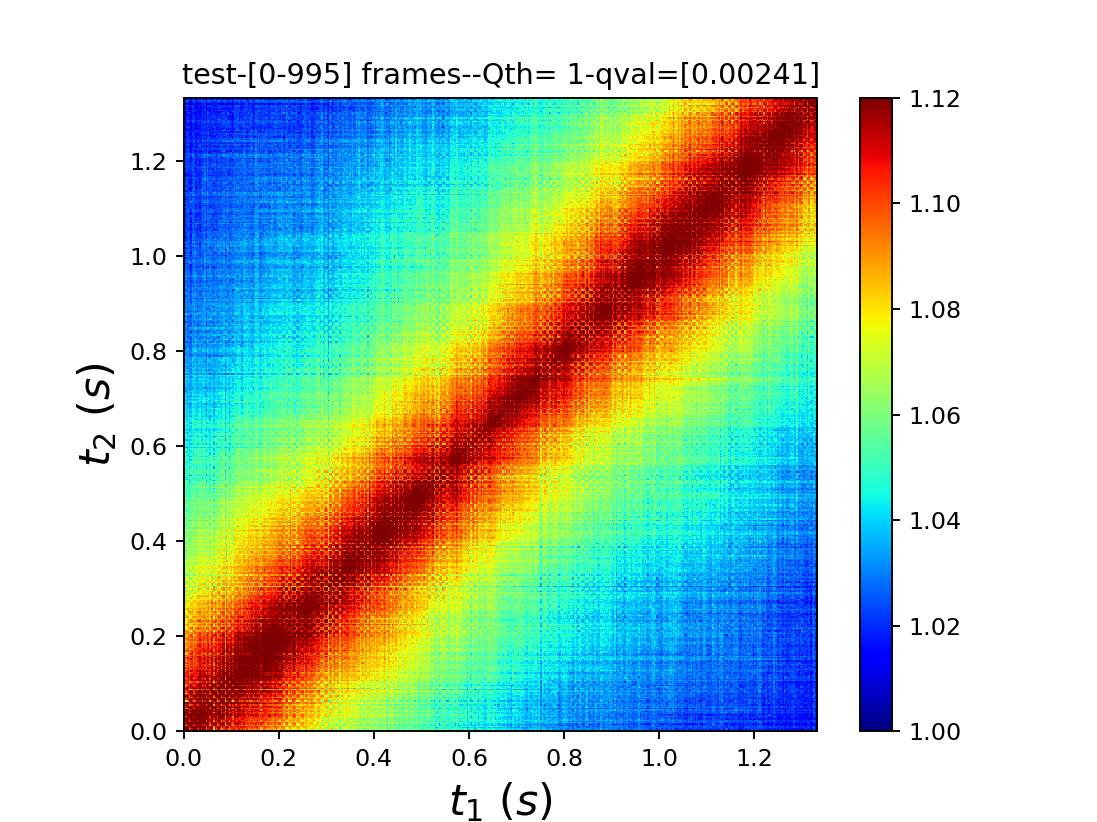

In [162]:
show_C12(g12b, q_ind= 1, N1= 0,logs=False, N2= 1000, vmin=1.0, vmax=1.12,
             timeperframe= total_res[u]['md']['frame_time'], qlabel=total_res[u]['qval_dict'],
         save=False, path= outDir, uid = 'test', cmap=plt.cm.jet)#cmap=cmap_albula)    

# Get One-time by slicing Two-time

In [163]:
#%run /home/yuzhang/pyCHX_link/pyCHX/Two_Time_Correlation_Function.py

In [164]:
from pyCHX.Two_Time_Correlation_Function import get_time_edge

In [165]:
g12b.shape

(995, 995, 16)

In [166]:
 
age_edge, age_center = get_time_edge(  tstart=105, tend= 1000-105, nots = 6, twidth= 100  )

In [167]:
age_edge, age_center

(array([[ 55., 155.],
        [213., 313.],
        [371., 471.],
        [529., 629.],
        [687., 787.],
        [845., 945.]]), array([105., 263., 421., 579., 737., 895.]))

In [168]:
#total_res[u]['md']['frame_time']  

In [169]:
#for the second Q

taus_aged, g2_aged = get_aged_g2_from_g12q( g12b[:,:,1], age_edge, age_center,
                                           timeperframe= total_res[u]['md']['frame_time'],time_sampling='log'   )

In [170]:
plot_aged_g2( g2_aged, tau=taus_aged, ylim=[1,1.18])

<IPython.core.display.Javascript object>

In [171]:
np.array(sorted(list(g2_aged.keys())))

array([0.1407    , 0.35241999, 0.56413998, 0.77585998, 0.98757997,
       1.19929996])

In [172]:
show_g12q_aged_g2( g12b[:,:,1], g2_aged, taus_aged = taus_aged, slice_width= 50,
                  timeperframe=total_res[u]['md']['frame_time'],vmin= 1, vmax= 1.22 )

the cut age centers are: [0.1407     0.35241999 0.56413998 0.77585998 0.98757997 1.19929996]


<IPython.core.display.Javascript object>

### Do more plots and analysis 

### 1) plot g4

In [173]:
qth_interest = 1 #3      #the intested single qth 

<IPython.core.display.Javascript object>


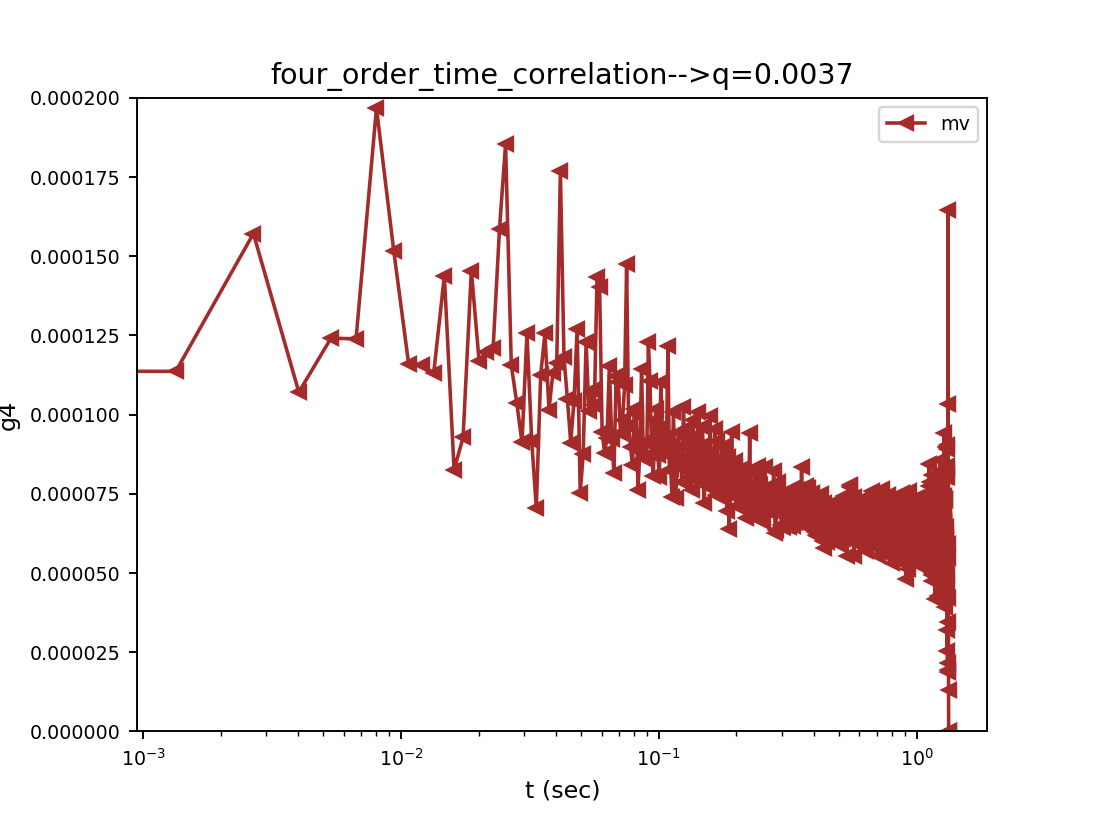

mv


In [177]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    print(u)
    plot1D( x =  total_res[u]['taus4'], y= total_res[u]['g4'][:,qth_interest],
                   ax=ax, legend= u, ylim=[0, 0.0002], legend_size = 8, xlabel='t (sec)', ylabel='g4',
           title='four_order_time_correlation-->q=%s'%total_res[u]['qval_dict'][qth_interest][0], logx=True )
    
plt.savefig( outDir +'g4_1.png' )    

### 2) Load g2 and re-do fit

In [179]:
fit_g2_func = 'stretched'

for u in sorted(list( uid_dict.keys() )):
    g2 = total_res[u]['g2']
    taus = total_res[u]['taus']    
    g2_fit_result, taus_fit, g2_fit = get_g2_fit_general( g2,  taus, 
                function = fit_g2_func,  vlim=[0.95, 1.05], fit_range= None,  
            fit_variables={'baseline':False, 'beta':True, 'alpha':False,'relaxation_rate':True},                                  
            guess_values={'baseline':1.0,'beta':0.05,'alpha':1.0,'relaxation_rate':0.01,})     
    g2_fit_paras = save_g2_fit_para_tocsv(g2_fit_result,  filename= u  +'_g2_fit_paras.csv', path=outDir )    
    #print( g2.shape)

The g2 fitting parameters are saved in /nsls2/xf11id1/analysis/2019_3/yuzhang/Results/Post/mv_g2_fit_paras.csv


### 3) Plot g2

<IPython.core.display.Javascript object>


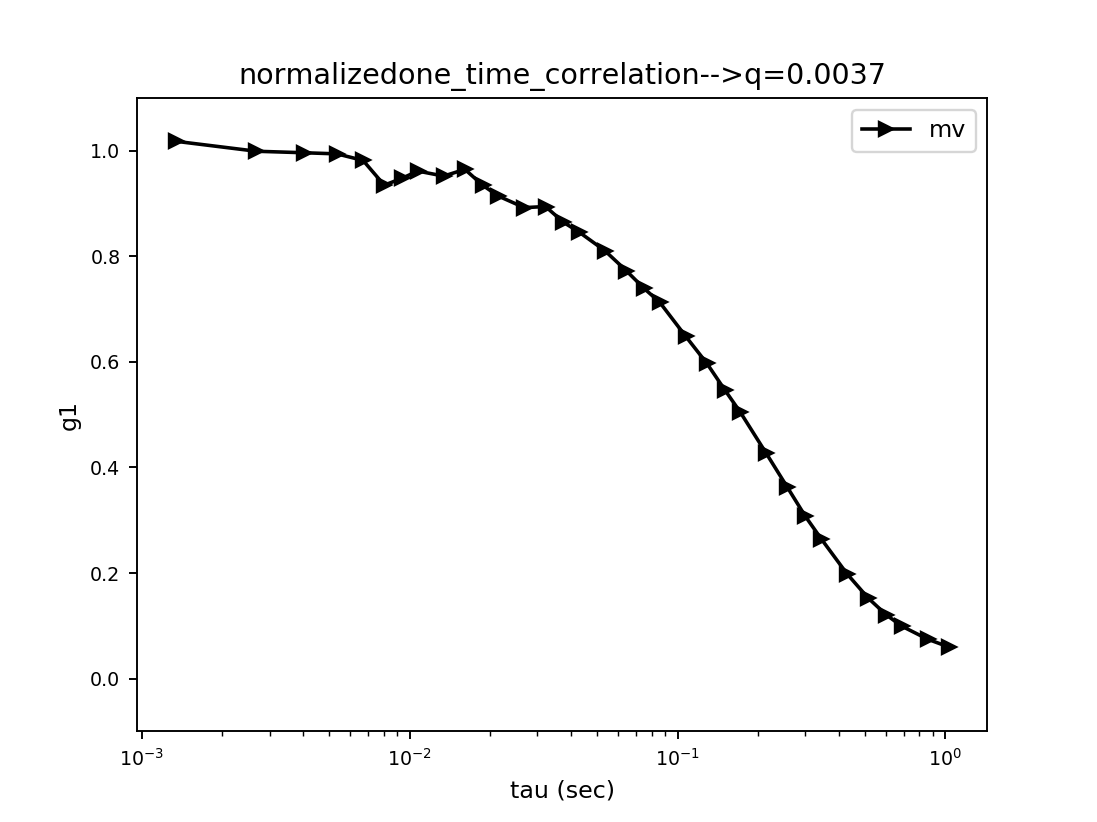

In [183]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    y= total_res[u]['g2'][1:,qth_interest]
    #ym = (y-y.min())/(y.max()-y.min())    
    
    #fits = total_res[u]['g2_fit_paras']  #here load from XPCS_Single Pipeline fit results
    fits = pds.read_csv( outDir + u + '_g2_fit_paras.csv' )  #load from re-fit results    
    ym = ( y -  fits['baseline'][qth_interest] )/ fits['beta'][qth_interest]    
    plot1D( x =  total_res[u]['taus'][1:], y= ym,
                   ax=ax, legend= u, ylim=[-0.1, 1.1], legend_size = 10, xlabel='tau (sec)', ylabel='g1',
           title='normalized' +'one_time_correlation-->q=%s'%total_res[u]['qval_dict'][qth_interest][0], logx=True )
    
plt.savefig( outDir +'normalized'+'g1_new_.png' ) 

<IPython.core.display.Javascript object>


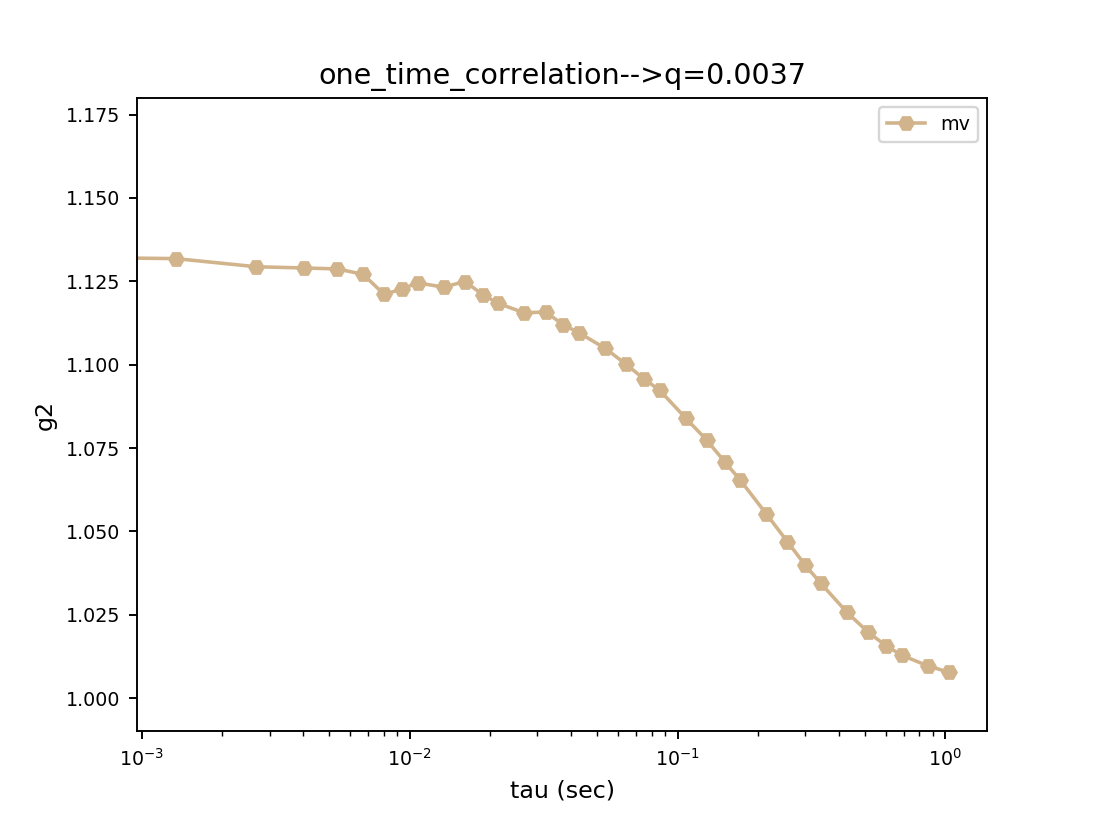

In [186]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    plot1D( x =  total_res[u]['taus'], y= total_res[u]['g2'][:,qth_interest],
                   ax=ax, legend= u, ylim=[0.99, 1.18], legend_size = 8, xlabel='tau (sec)', ylabel='g2',
           title='one_time_correlation-->q=%s'%total_res[u]['qval_dict'][qth_interest][0], logx=True )
plt.savefig( outDir +'g2_new.png' )  

### 4) Plot q~relaxation time

In [187]:
qs = np.array([total_res[u]['qval_dict'][i][0] for i in range(   len(list(total_res[u]['qval_dict'].keys()))   ) ])

<IPython.core.display.Javascript object>


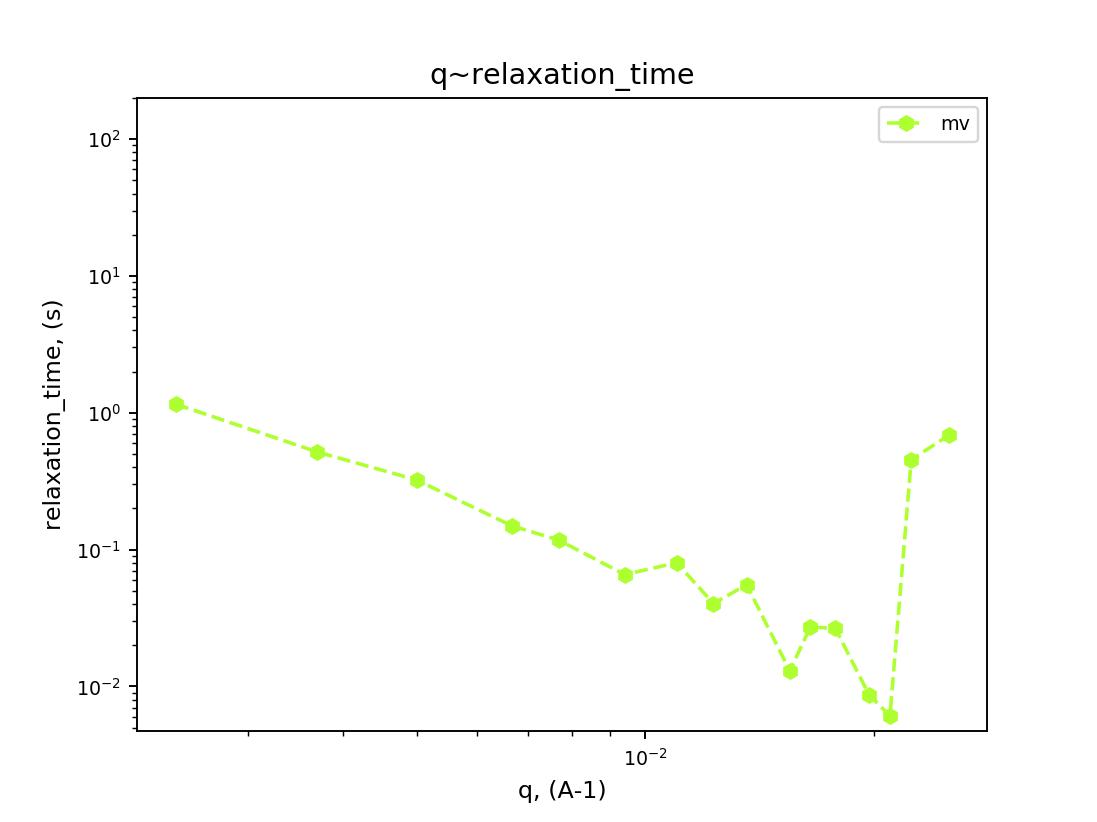

/nsls2/xf11id1/analysis/Analysis_Pipelines/Develop/pyCHX/pyCHX/chx_generic_functions.py:3464: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(    kwargs['ylim']  )


In [189]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    x= qs
    
    #y= 1/total_res[u]['g2_fit_paras']['relaxation_rate']  #here load from XPCS_Single Pipeline fit results
    y =  1/ ( pds.read_csv( outDir + u + '_g2_fit_paras.csv' )['relaxation_rate'] ) #load from re-fit results
    
    #print(y)
    plot1D( x =  qs, y= y, ax=ax, ylim=[0,200], legend= u, legend_size = 8, ls = '--',
           xlabel='q, (A-1)', ylabel='relaxation_time, (s)',
           title='q~relaxation_time', logx=True, logy=True )
plt.savefig( outDir +'q~relaxation_time.png' )  